In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.base import clone

In [2]:
# Load data
df = pd.read_csv('owid-co2-data.csv')

In [3]:
# summary info about the loaded data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [4]:
# shape of the data
df.shape

(50191, 79)

Rows: 50191
Columns: 79

In [5]:
# first 10 rows of the data
df.head(10)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1755,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1756,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1757,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1758,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1759,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# check for missing/ null values
df.isnull().sum()

country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64

Before handling the missing values, first drop unnecessary columns keeping only key CO2 emission features/possible influencing factors.

In [7]:
# Columns of interest for analysis
col = ['year','country','population',
       'gdp','co2_including_luc','co2_per_capita','co2_per_gdp',
       'co2_per_unit_energy','energy_per_capita',
       'energy_per_gdp',
       'primary_energy_consumption',
       'share_global_co2_including_luc',
       'temperature_change_from_co2','temperature_change_from_ch4',
       'temperature_change_from_ghg','temperature_change_from_n2o',
       'total_ghg','total_ghg_excluding_lucf']
# Define a new dataset containing only these columns

df2 = df[col]

In [8]:
#shape of the new dataset
df2.shape

(50191, 18)

In [9]:
#summary info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            50191 non-null  int64  
 1   country                         50191 non-null  object 
 2   population                      41019 non-null  float64
 3   gdp                             15251 non-null  float64
 4   co2_including_luc               23585 non-null  float64
 5   co2_per_capita                  26182 non-null  float64
 6   co2_per_gdp                     17528 non-null  float64
 7   co2_per_unit_energy             10350 non-null  float64
 8   energy_per_capita               10109 non-null  float64
 9   energy_per_gdp                  7696 non-null   float64
 10  primary_energy_consumption      10151 non-null  float64
 11  share_global_co2_including_luc  23585 non-null  float64
 12  temperature_change_from_co2     

In [10]:
#check for missing values
df2.isnull().sum()

year                                  0
country                               0
population                         9172
gdp                               34940
co2_including_luc                 26606
co2_per_capita                    24009
co2_per_gdp                       32663
co2_per_unit_energy               39841
energy_per_capita                 40082
energy_per_gdp                    42495
primary_energy_consumption        40040
share_global_co2_including_luc    26606
temperature_change_from_co2        9190
temperature_change_from_ch4       12131
temperature_change_from_ghg        9190
temperature_change_from_n2o       12131
total_ghg                         12781
total_ghg_excluding_lucf          12955
dtype: int64

In [11]:
#Drop the data to include 1990-2023
df3 = df2[(df2['year']>1989)]

In [12]:
df3.head(10)

,year,country,population,gdp,co2_including_luc,co2_per_capita,co2_per_gdp,co2_per_unit_energy,energy_per_capita,energy_per_gdp,primary_energy_consumption,share_global_co2_including_luc,temperature_change_from_co2,temperature_change_from_ch4,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
240,1990,Afghanistan,12045664.0,1.306598e+10,2.185,0.168,0.155,0.064,2968.316,2.430,31.746,0.008,0.0,0.0,0.001,0.0,13.892,4.218
241,1991,Afghanistan,12238879.0,1.204736e+10,1.915,0.156,0.159,0.138,1293.862,1.154,13.903,0.007,0.0,0.0,0.001,0.0,14.178,4.207
242,1992,Afghanistan,13278982.0,1.267754e+10,-0.179,0.112,0.117,0.162,760.342,0.723,9.168,-0.001,0.0,0.0,0.001,0.0,12.514,3.853
243,1993,Afghanistan,14943174.0,9.834582e+09,-2.575,0.100,0.151,0.163,650.207,0.926,9.105,-0.009,0.0,0.0,0.001,0.0,11.804,4.021
244,1994,Afghanistan,16250799.0,7.919857e+09,-1.994,0.089,0.184,0.165,570.403,1.113,8.816,-0.007,0.0,0.0,0.001,0.0,12.282,4.159
245,1995,Afghanistan,17065836.0,1.230753e+10,-1.051,0.083,0.115,0.191,452.460,0.604,7.429,-0.004,0.0,0.0,0.001,0.0,13.319,4.321
246,1996,Afghanistan,17763265.0,1.207013e+10,1.356,0.077,0.114,0.188,425.906,0.604,7.286,0.004,0.0,0.0,0.001,0.0,15.723,4.425
247,1997,Afghanistan,18452100.0,1.185075e+10,4.953,0.071,0.110,0.188,390.019,0.585,6.938,0.016,0.0,0.0,0.001,0.0,18.584,4.466
248,1998,Afghanistan,19159996.0,1.169217e+10,0.979,0.067,0.109,0.189,365.121,0.577,6.752,0.003,0.0,0.0,0.001,0.0,17.581,4.528
249,1999,Afghanistan,19887791.0,1.151732e+10,1.859,0.055,0.095,0.162,350.347,0.586,6.749,0.006,0.0,0.0,0.001,0.0,19.208,4.431


In [13]:
df3.shape

(8663, 18)

In [14]:
#Check for missing data
df3.isnull().sum()

year                                 0
country                              0
population                         843
gdp                               3242
co2_including_luc                 1502
co2_per_capita                     826
co2_per_gdp                       2715
co2_per_unit_energy               1493
energy_per_capita                 1647
energy_per_gdp                    3378
primary_energy_consumption        1615
share_global_co2_including_luc    1502
temperature_change_from_co2        605
temperature_change_from_ch4       1183
temperature_change_from_ghg        605
temperature_change_from_n2o       1183
total_ghg                         1353
total_ghg_excluding_lucf          1387
dtype: int64

In [15]:
# drop missing values
df4 = df3.dropna().reset_index(drop=True)

In [16]:
df4.shape

(5161, 18)

In [17]:
df4.isnull().sum()


year                              0
country                           0
population                        0
gdp                               0
co2_including_luc                 0
co2_per_capita                    0
co2_per_gdp                       0
co2_per_unit_energy               0
energy_per_capita                 0
energy_per_gdp                    0
primary_energy_consumption        0
share_global_co2_including_luc    0
temperature_change_from_co2       0
temperature_change_from_ch4       0
temperature_change_from_ghg       0
temperature_change_from_n2o       0
total_ghg                         0
total_ghg_excluding_lucf          0
dtype: int64

In [18]:
# summary statistics from the numerical columns
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5161.0,2.005856e+03,9.363566e+00,1.990000e+03,1.998000e+03,2.006000e+03,2.014000e+03,2.022000e+03
population,5161.0,5.732573e+07,3.676019e+08,6.722300e+04,3.760561e+06,9.967032e+06,2.879400e+07,8.021407e+09
gdp,5161.0,7.258924e+11,5.216278e+12,2.571720e+08,1.950644e+10,6.359821e+10,3.010554e+11,1.301126e+14
co2_including_luc,5161.0,3.010676e+02,1.931545e+03,-3.058800e+01,1.079700e+01,4.083900e+01,1.149360e+02,4.093648e+04
co2_per_capita,5161.0,5.015672e+00,8.442282e+00,2.200000e-02,6.130000e-01,2.664000e+00,6.935000e+00,3.646880e+02
co2_per_gdp,5161.0,3.512552e-01,1.191162e+00,2.000000e-02,1.540000e-01,2.460000e-01,3.960000e-01,8.257600e+01
co2_per_unit_energy,5161.0,2.190661e-01,2.048553e-01,2.900000e-02,1.660000e-01,2.070000e-01,2.430000e-01,1.068600e+01
energy_per_capita,5161.0,2.589035e+04,3.560825e+04,9.905300e+01,2.921882e+03,1.303286e+04,3.371213e+04,3.175766e+05
energy_per_gdp,5161.0,1.660206e+00,1.540248e+00,7.800000e-02,8.470000e-01,1.245000e+00,2.004000e+00,2.302100e+01
primary_energy_consumption,5161.0,1.128659e+03,7.521638e+03,2.570000e-01,2.401100e+01,9.034800e+01,4.445830e+02,1.687082e+05


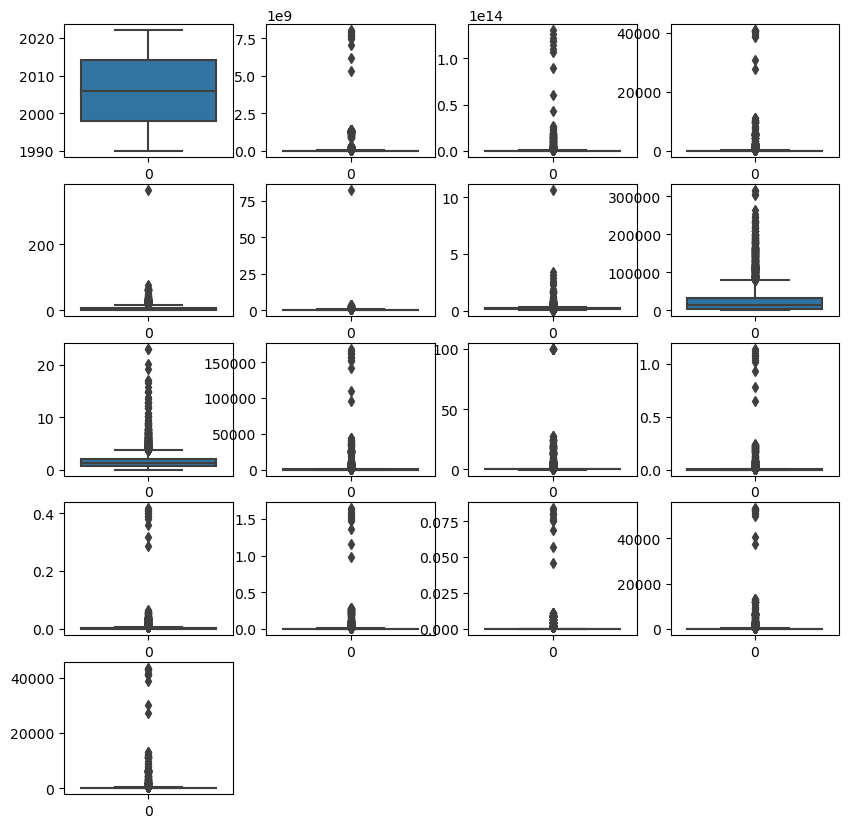

In [19]:
# Check for outliers in numeric columns
num_col = ['year','population',
       'gdp','co2_including_luc','co2_per_capita','co2_per_gdp',
       'co2_per_unit_energy','energy_per_capita',
       'energy_per_gdp',
       'primary_energy_consumption',
       'share_global_co2_including_luc',
       'temperature_change_from_co2','temperature_change_from_ch4',
       'temperature_change_from_ghg','temperature_change_from_n2o',
       'total_ghg','total_ghg_excluding_lucf']
j=1 
fig = plt.figure(figsize = (10,10))
for i in num_col:
    plt.subplot(5,4,j)
    sns.boxplot(df4[i])
    j=j+1

In [20]:
# unique country names
df4['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Jap

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


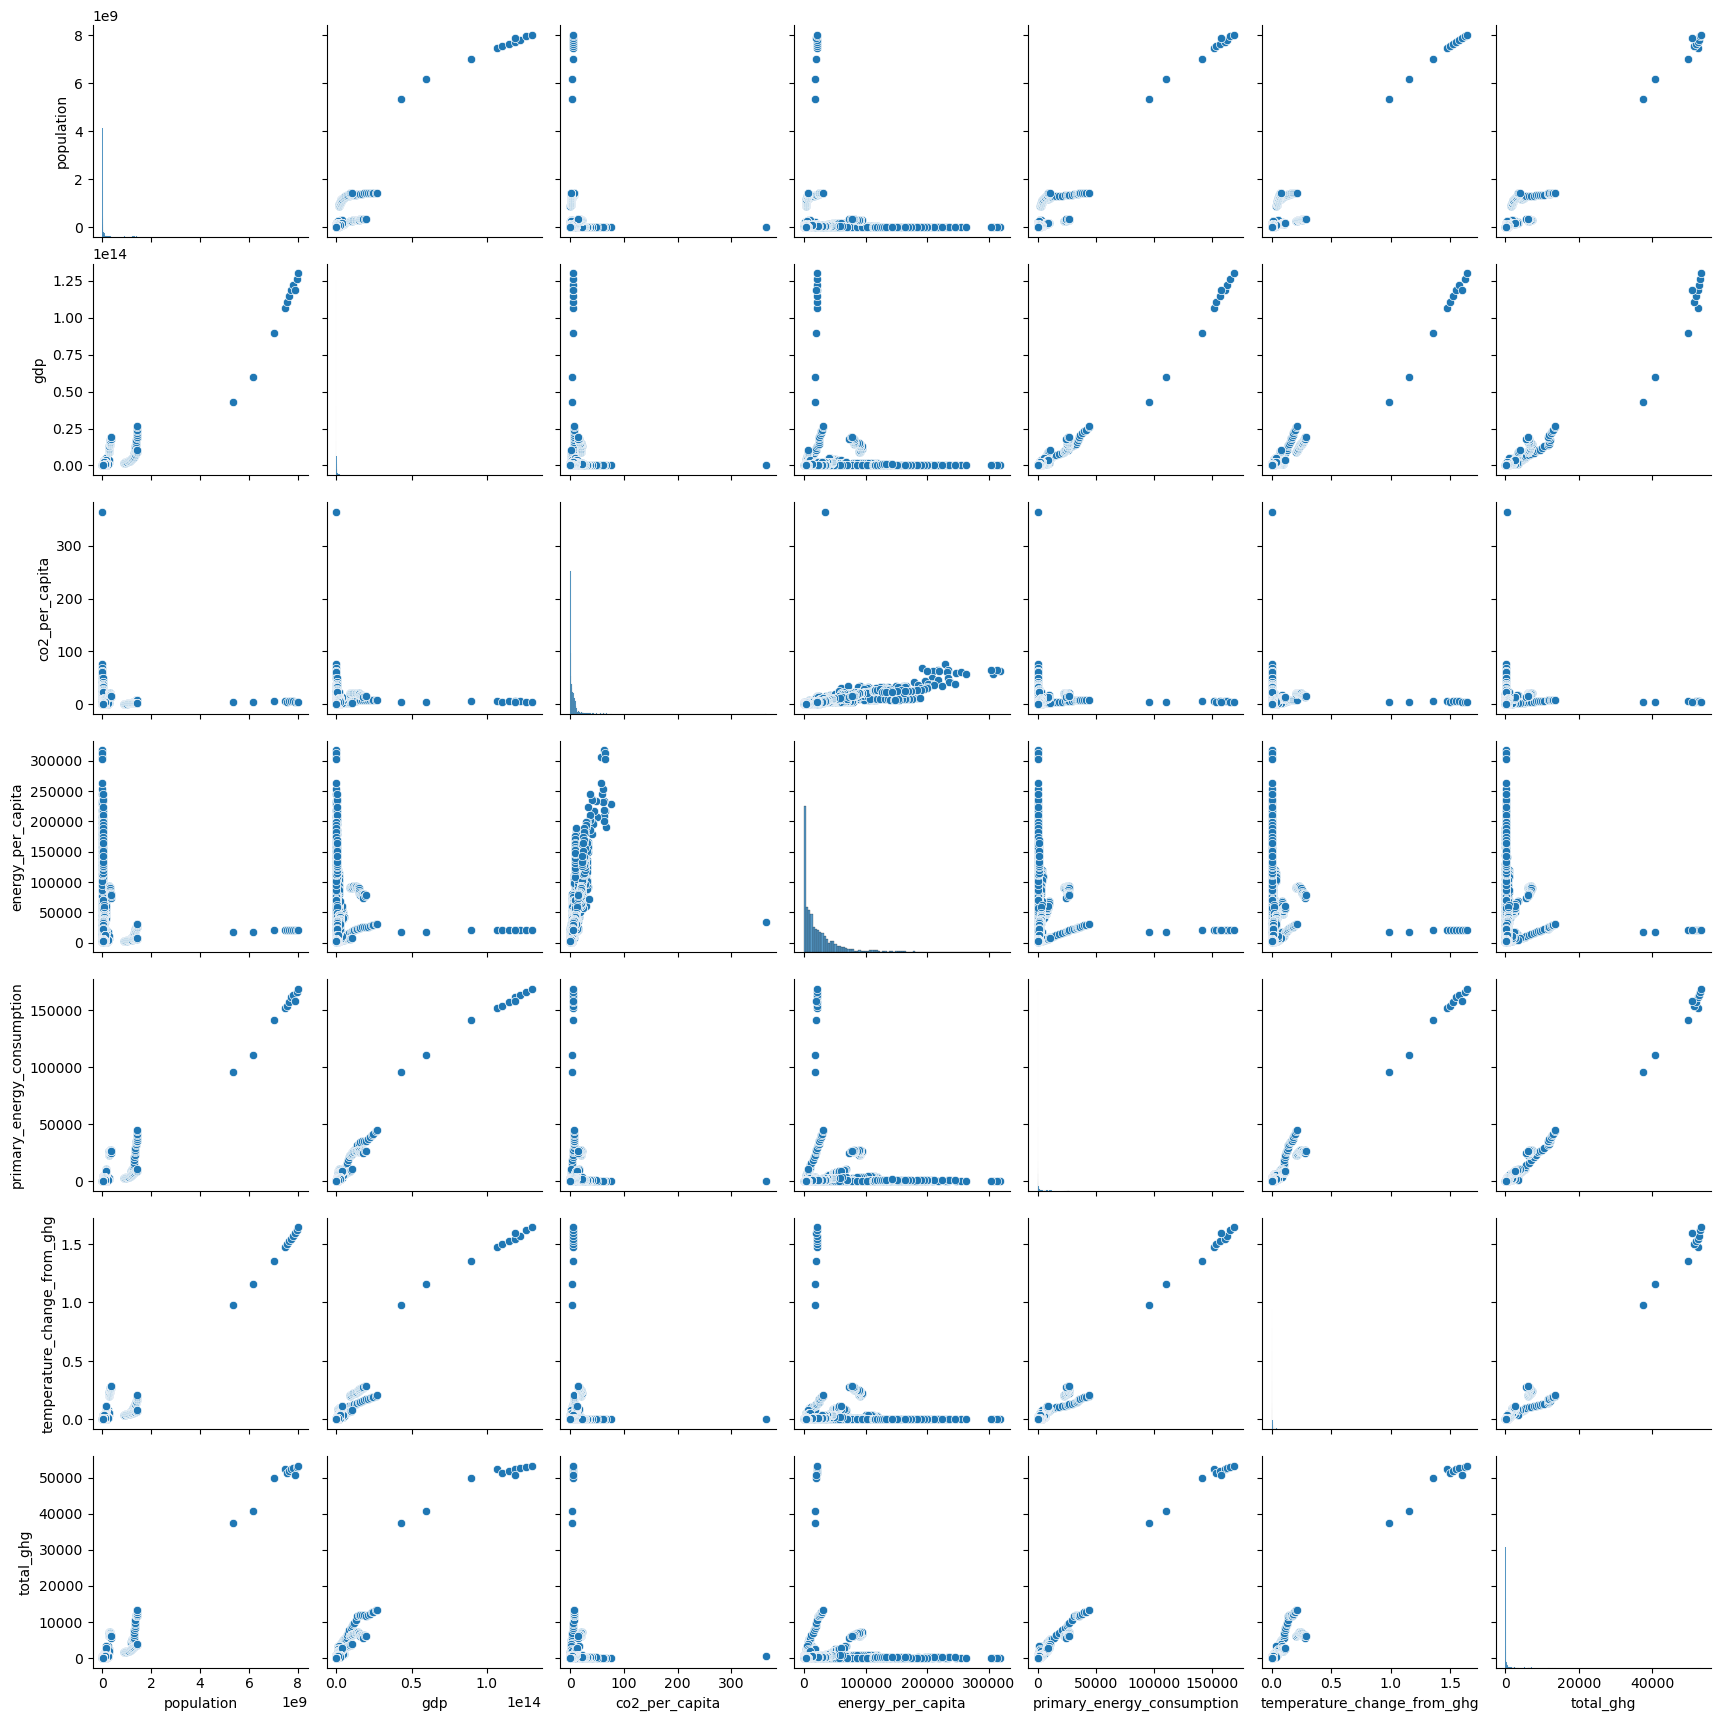

In [22]:
# List of selected columns including target and features for regression analysis
sel_col = ['population',
       'gdp','co2_per_capita','energy_per_capita','primary_energy_consumption',
       'temperature_change_from_ghg',
       'total_ghg']
# negative values replace with absolute values
df4 = df4[sel_col].abs()

sns.pairplot(df4[sel_col])

Text(0.5, 1.0, 'Correlation Heatmap')

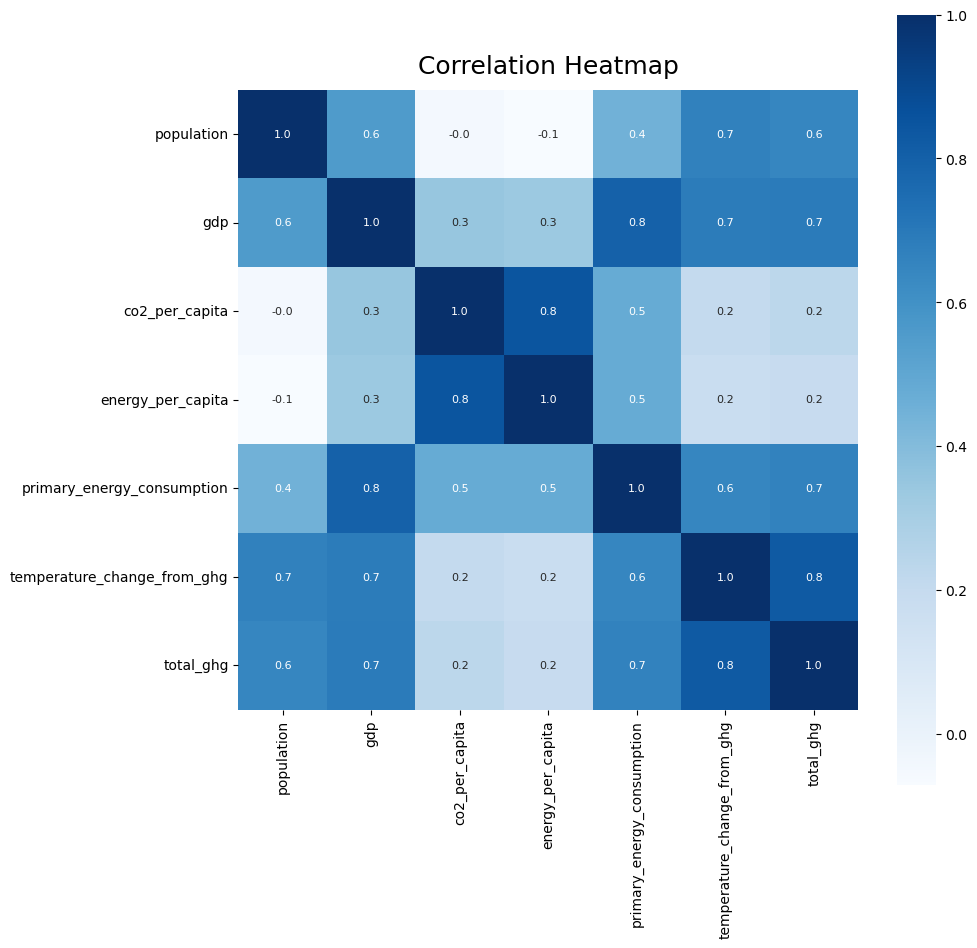

In [23]:
# constructing a heatmap to understand the correlation between the selected columns
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df4.corr(method = 'kendall'), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [24]:
df4.head()

,population,gdp,co2_per_capita,energy_per_capita,primary_energy_consumption,temperature_change_from_ghg,total_ghg
0,12045664.0,1.306598e+10,0.168,2968.316,31.746,0.001,13.892
1,12238879.0,1.204736e+10,0.156,1293.862,13.903,0.001,14.178
2,13278982.0,1.267754e+10,0.112,760.342,9.168,0.001,12.514
3,14943174.0,9.834582e+09,0.100,650.207,9.105,0.001,11.804
4,16250799.0,7.919857e+09,0.089,570.403,8.816,0.001,12.282


In [25]:
# Define target and features and split the data into training and testing data
target = 'co2_per_capita'
features = [
    'population','gdp','energy_per_capita','primary_energy_consumption','temperature_change_from_ghg','total_ghg']

X = df4[features]
y = df4[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test))
r2_rf = r2_score(y_test, y_pred_rf)



In [26]:
print(f"Random Forest Regression Results:")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAPE: {mape_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

Random Forest Regression Results:
MAE: 0.5160
RMSE: 5.5678
MAPE: 0.1411
R²: 0.3602


In [27]:
# Tuning Random forest parameters
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

rfnew=RandomForestRegressor(random_state=2)
rfpipe=Pipeline(steps=[('sc',scaler),('rfnew',rfnew)])
params=dict(rfnew__max_depth=list(range(2,8)),rfnew__n_estimators=list(range(50,150)))

rcv=RandomizedSearchCV(rfpipe,params,scoring='neg_mean_squared_error',cv=4)

rcv.fit(X_train,y_train)
rcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('rfnew',
   RandomForestRegressor(max_depth=7, n_estimators=147, random_state=2))],
 'verbose': False,
 'sc': StandardScaler(),
 'rfnew': RandomForestRegressor(max_depth=7, n_estimators=147, random_state=2),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'rfnew__bootstrap': True,
 'rfnew__ccp_alpha': 0.0,
 'rfnew__criterion': 'squared_error',
 'rfnew__max_depth': 7,
 'rfnew__max_features': 1.0,
 'rfnew__max_leaf_nodes': None,
 'rfnew__max_samples': None,
 'rfnew__min_impurity_decrease': 0.0,
 'rfnew__min_samples_leaf': 1,
 'rfnew__min_samples_split': 2,
 'rfnew__min_weight_fraction_leaf': 0.0,
 'rfnew__n_estimators': 147,
 'rfnew__n_jobs': None,
 'rfnew__oob_score': False,
 'rfnew__random_state': 2,
 'rfnew__verbose': 0,
 'rfnew__warm_start': False}

Based on the randomized search, the choice max_depth is 7 and the n_estimators is 72

In [28]:
rf_final1=RandomForestRegressor(max_depth=7,n_estimators=147,random_state=2)
rf_final1.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=147, random_state=2)

In [29]:
pred1=rf_final1.predict(X_test)

rf_mae = mean_absolute_error(y_test, pred1)
rf_mse = np.sqrt(mean_squared_error(y_test, pred1))
rf_mape = np.mean(np.abs((y_test - pred1) / y_test))
rf_rsquared = r2_score(y_test, pred1)

print(f"Random Forest Regression Results After Tuning:")
print(f"MAE: {rf_mae:.4f}")
print(f"RMSE: {rf_mse:.4f}")
print(f"MAPE: {rf_mape:.4f}")
print(f"R²: {rf_rsquared:.4f}")

Random Forest Regression Results After Tuning:
MAE: 0.8575
RMSE: 5.4515
MAPE: 0.2686
R²: 0.3867


# Further Processing

Below, analysis of the data excluding world statistics is done. First, the world data is filtered out and resulting dataset is processed for regression analysis.

In [30]:
# World data
w_data = df3[df3['country'] == 'World']

In [31]:
w_data.head(10)

,year,country,population,gdp,co2_including_luc,co2_per_capita,co2_per_gdp,co2_per_unit_energy,energy_per_capita,energy_per_gdp,primary_energy_consumption,share_global_co2_including_luc,temperature_change_from_co2,temperature_change_from_ch4,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
49535,1990,World,5.327803e+09,4.303361e+13,27705.590,4.266,0.528,0.238,17972.461,2.22,95544.766,100.0,0.648,0.286,0.981,0.046,37335.879,27274.096
49536,1991,World,5.418736e+09,NaN,28156.088,4.279,NaN,0.241,17814.373,NaN,96308.883,100.0,0.660,0.290,0.998,0.047,37748.945,27719.375
49537,1992,World,5.505990e+09,NaN,27786.176,4.092,NaN,0.233,17637.264,NaN,96875.953,100.0,0.673,0.294,1.015,0.049,37381.090,27070.875
49538,1993,World,5.591545e+09,NaN,27729.648,4.070,NaN,0.233,17508.812,NaN,97654.242,100.0,0.685,0.297,1.031,0.050,37327.961,27329.488
49539,1994,World,5.675551e+09,NaN,28882.324,4.051,NaN,0.232,17470.807,NaN,98897.477,100.0,0.698,0.300,1.048,0.051,38563.020,27603.963
49540,1995,World,5.758879e+09,NaN,28964.484,4.086,NaN,0.233,17595.949,NaN,101057.406,100.0,0.710,0.304,1.066,0.052,38797.141,28240.766
49541,1996,World,5.842056e+09,NaN,30270.709,4.152,NaN,0.233,17848.607,NaN,103970.734,100.0,0.724,0.307,1.084,0.053,40186.062,29024.330
49542,1997,World,5.924788e+09,NaN,31808.471,4.119,NaN,0.232,17781.023,NaN,105023.281,100.0,0.738,0.310,1.102,0.054,41658.656,29171.246
49543,1998,World,6.007067e+09,NaN,30448.242,4.046,NaN,0.230,17642.604,NaN,105631.781,100.0,0.751,0.314,1.119,0.055,40217.953,28937.402
49544,1999,World,6.089006e+09,NaN,30856.643,4.082,NaN,0.231,17704.828,NaN,107428.625,100.0,0.765,0.316,1.137,0.056,40655.059,29459.615


In [32]:
# Delete world data from country dataset

df5 = df3[(df3['country'] != 'World')]

In [33]:
df5['country'].unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (GCP)', 'Asia (excl. China and India)', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Domini

In [34]:
df5.shape

(8629, 18)

In [35]:
df5.isnull().sum()

year                                 0
country                              0
population                         843
gdp                               3219
co2_including_luc                 1502
co2_per_capita                     826
co2_per_gdp                       2692
co2_per_unit_energy               1493
energy_per_capita                 1647
energy_per_gdp                    3355
primary_energy_consumption        1615
share_global_co2_including_luc    1502
temperature_change_from_co2        605
temperature_change_from_ch4       1183
temperature_change_from_ghg        605
temperature_change_from_n2o       1183
total_ghg                         1353
total_ghg_excluding_lucf          1387
dtype: int64

In [36]:
df5 = df5.dropna().reset_index(drop = True)

In [37]:
df5.shape

(5150, 18)

In [38]:
# summary statistics from the numerical columns
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5150.0,2.005840e+03,9.356711e+00,1.990000e+03,1.998000e+03,2.006000e+03,2.014000e+03,2.022000e+03
population,5150.0,4.179770e+07,1.444751e+08,6.722300e+04,3.748765e+06,9.944630e+06,2.844263e+07,1.426437e+09
gdp,5150.0,5.060506e+11,1.744655e+12,2.571720e+08,1.944772e+10,6.328844e+10,2.977585e+11,2.696602e+13
co2_including_luc,5150.0,2.202061e+02,7.941504e+02,-3.058800e+01,1.073750e+01,4.061600e+01,1.137263e+02,1.116924e+04
co2_per_capita,5150.0,5.016572e+00,8.451267e+00,2.200000e-02,6.092500e-01,2.653000e+00,6.951250e+00,3.646880e+02
co2_per_gdp,5150.0,3.512713e-01,1.192429e+00,2.000000e-02,1.540000e-01,2.450000e-01,3.960000e-01,8.257600e+01
co2_per_unit_energy,5150.0,2.190449e-01,2.050734e-01,2.900000e-02,1.660000e-01,2.070000e-01,2.430000e-01,1.068600e+01
energy_per_capita,5150.0,2.590253e+04,3.564525e+04,9.905300e+01,2.909248e+03,1.297272e+04,3.374114e+04,3.175766e+05
energy_per_gdp,5150.0,1.660556e+00,1.541822e+00,7.800000e-02,8.460000e-01,1.244000e+00,2.005000e+00,2.302100e+01
primary_energy_consumption,5150.0,8.151016e+02,3.077417e+03,2.570000e-01,2.379500e+01,8.949000e+01,4.425455e+02,4.451631e+04


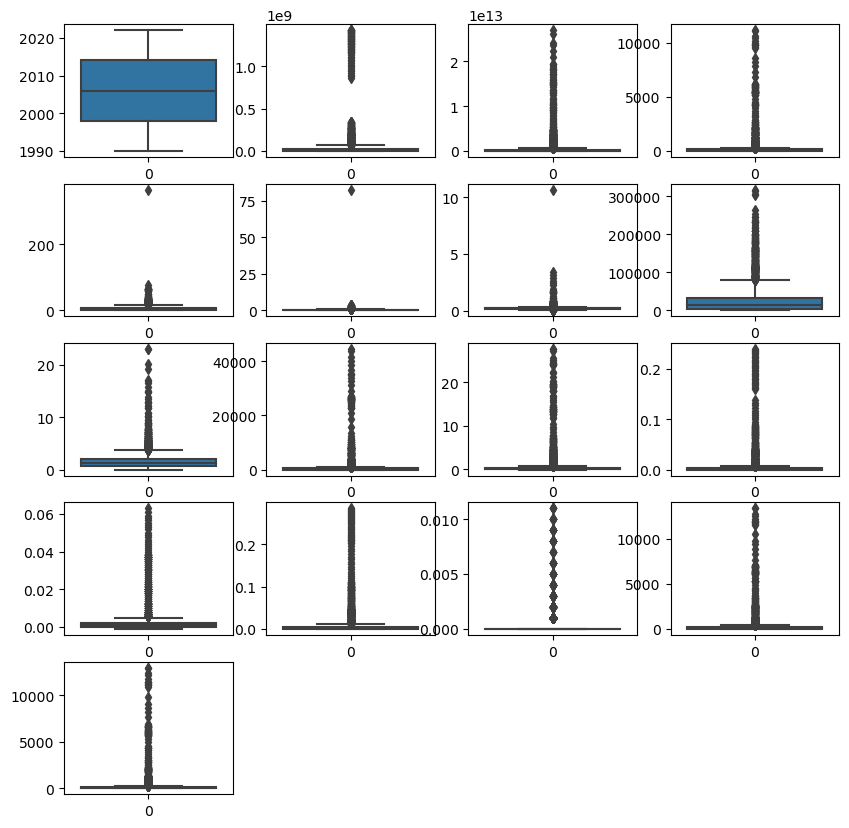

In [39]:
# Check for outliers in numeric columns using boxplot
j=1 
fig = plt.figure(figsize = (10,10))
for i in num_col:
    plt.subplot(5,4,j)
    sns.boxplot(df5[i])
    j=j+1

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


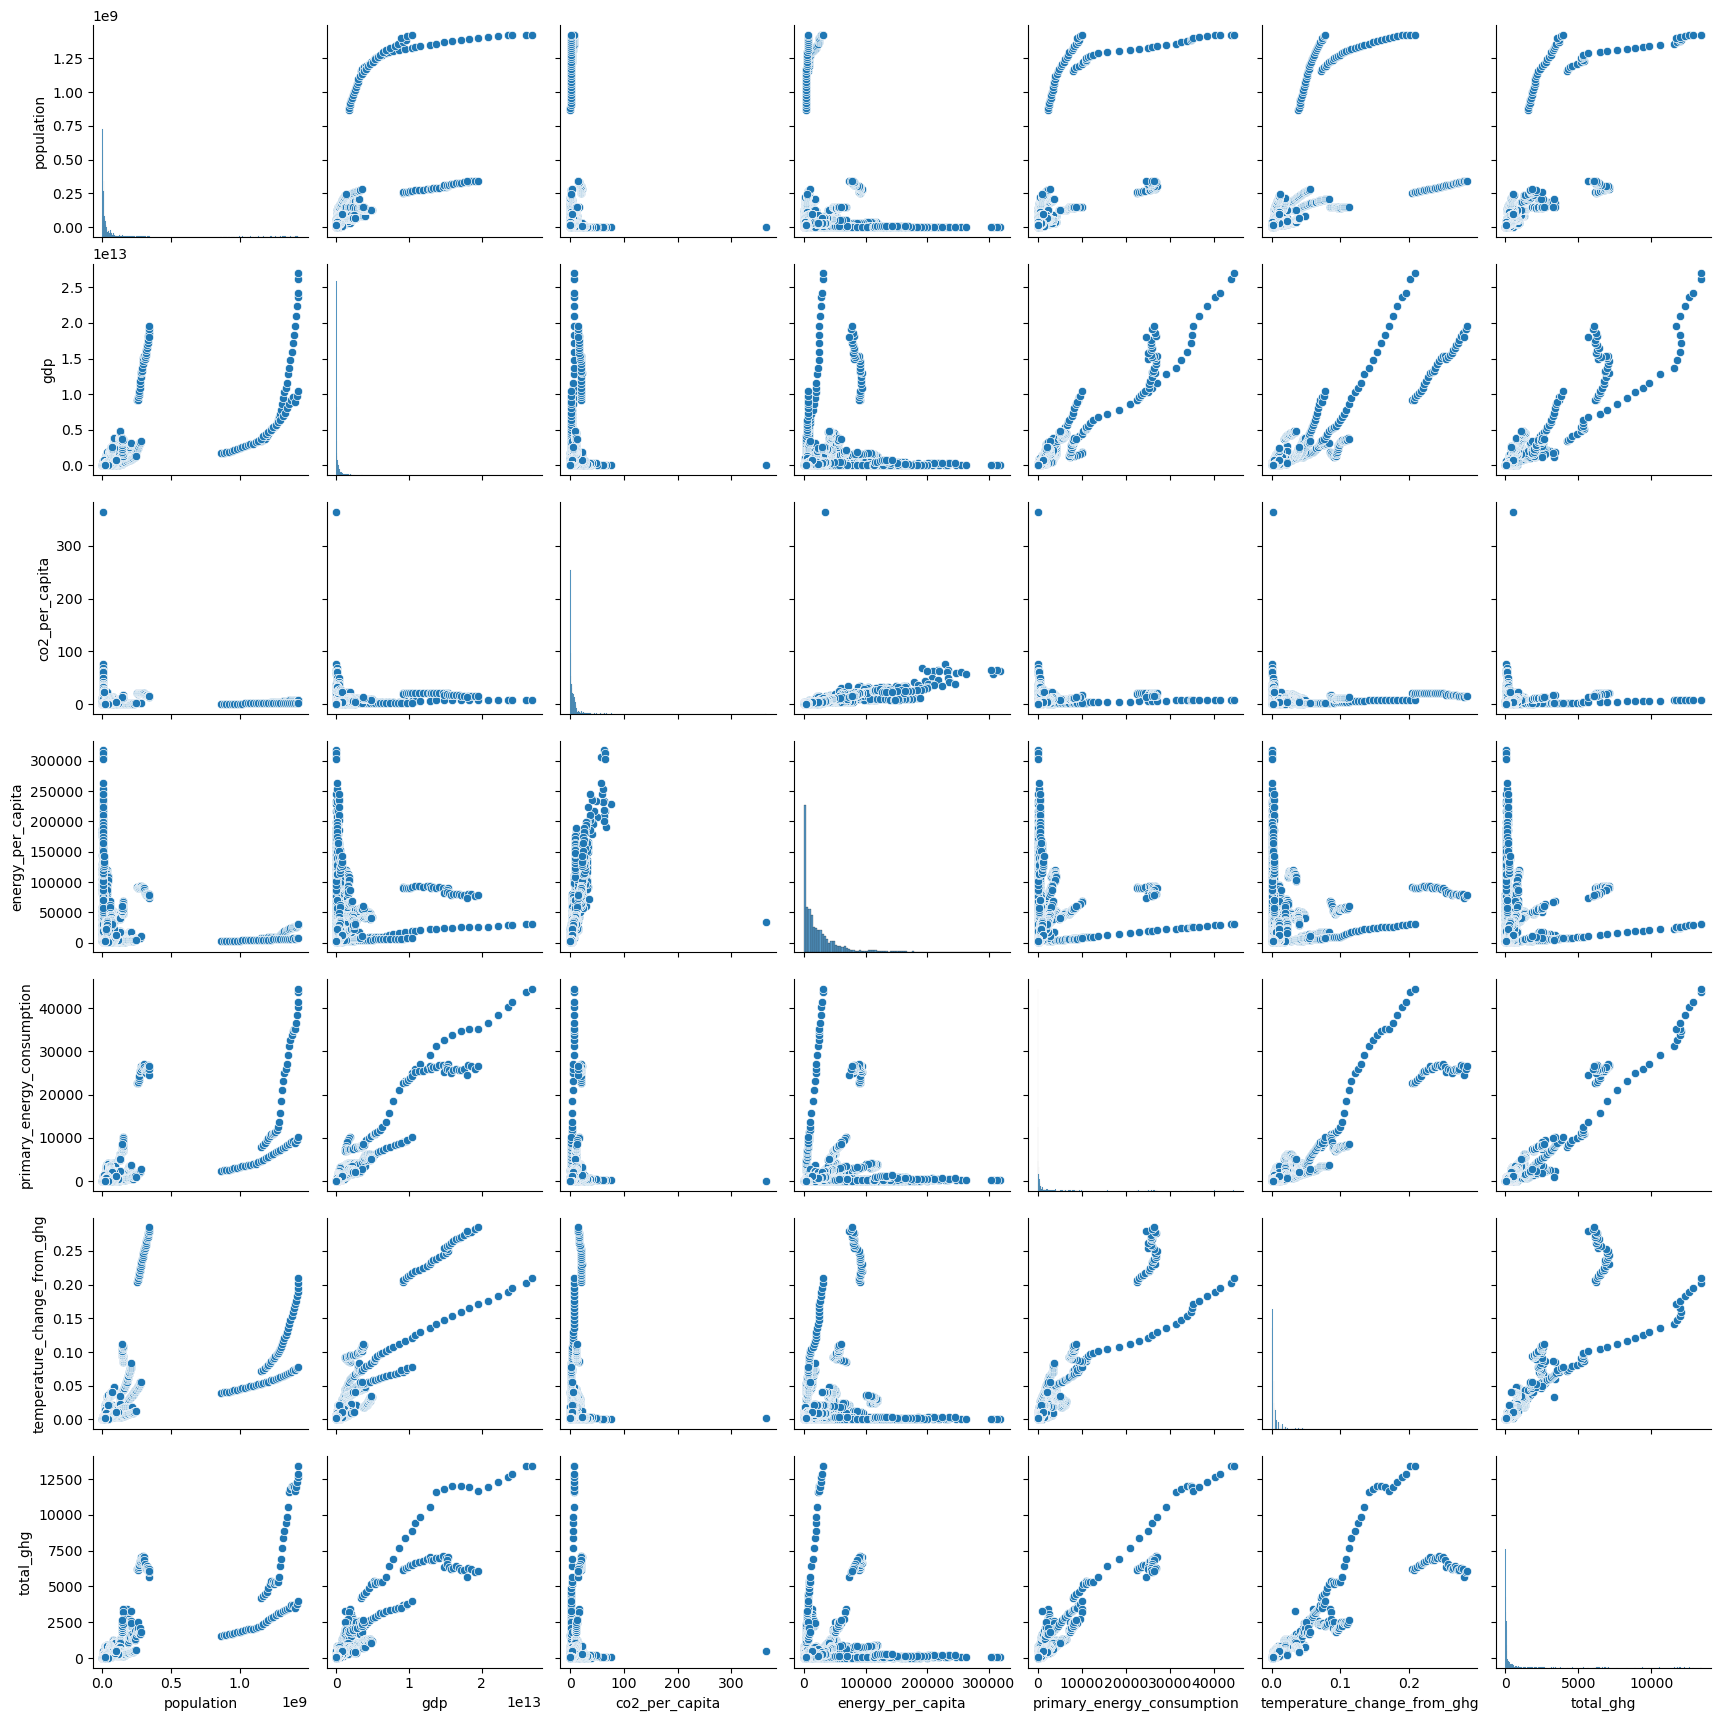

In [40]:
# negative values replace with absolute values
df6 = df5[sel_col].abs()

#pairplots

sns.pairplot(df6[sel_col])

Text(0.5, 1.0, 'Correlation Heatmap')

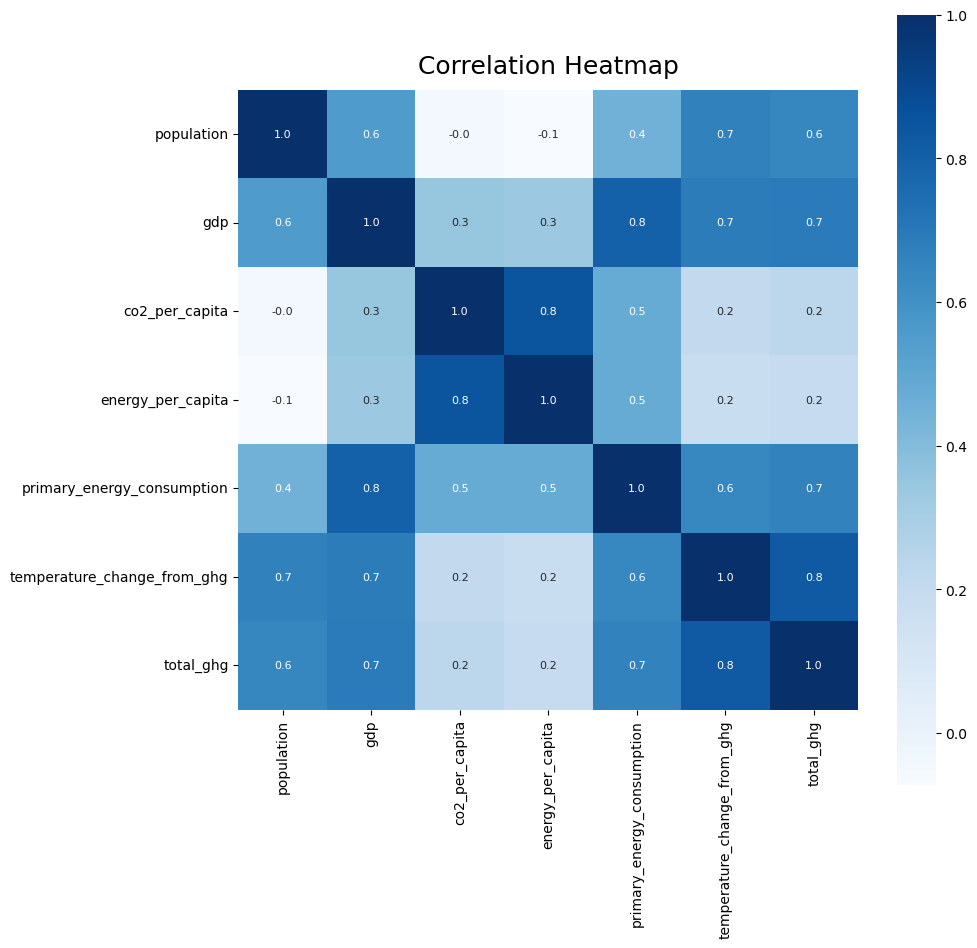

In [41]:
# constructing a heatmap to understand the correlation between the selected columns
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df6.corr(method = 'kendall'), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# 1. Random Forest Regression Model

In [42]:
# Define target and features and split the data into training and testing data
target5 = 'co2_per_capita'
features5 = [
    'population','gdp','energy_per_capita','primary_energy_consumption','temperature_change_from_ghg','total_ghg']

X5 = df6[features5]
y5 = df6[target5]

# Standardize features
scaler5 = StandardScaler()
X_scaled5 = scaler.fit_transform(X5)

# Split data
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_scaled5, y5, test_size=0.2, random_state=42)

# Initialize random forest regression model
rf5 = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit model
rf.fit(X_train5, y_train5)

# Predict
y_pred_rf5 = rf.predict(X_test5)

# Evaluate
mae_rf5 = mean_absolute_error(y_test5, y_pred_rf5)
rmse_rf5 = np.sqrt(mean_squared_error(y_test5, y_pred_rf5))
mape_rf5 = np.mean(np.abs((y_test5 - y_pred_rf5) / y_test5))
r2_rf5 = r2_score(y_test5, y_pred_rf5)

print(f"Random Forest Regression Results:")
print(f"MAE: {mae_rf5:.4f}")
print(f"RMSE: {rmse_rf5:.4f}")
print(f"MAPE: {mape_rf5:.4f}")
print(f"R²: {r2_rf5:.4f}")

Random Forest Regression Results:
MAE: 0.3424
RMSE: 1.0033
MAPE: 0.1155
R²: 0.9810


# 2. Decision Tree Regression Model

In [44]:
# Define your target and features
targetT = 'co2_per_capita'
featuresT = [
    'population','gdp','energy_per_capita','primary_energy_consumption','temperature_change_from_ghg','total_ghg'
]

# Split the data
X_T = df6[featuresT]
y_T = df6[targetT]
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_T, y_T, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=8, random_state=42)  # you can tune max_depth
tree.fit(X_trainT, y_trainT)

# Predictions
y_predT = tree.predict(X_testT)

# Evaluation
dt_mae = mean_absolute_error(y_testT, y_predT)
dt_rmse = np.sqrt(mean_squared_error(y_testT, y_predT))
dt_mape = mean_absolute_percentage_error(y_testT, y_predT)
dt_r2 = r2_score(y_testT, y_predT)

# Output the results
print(f"🌳 Decision Tree Regressor Results")
print(f"MAE: {dt_mae:.4f}")
print(f"RMSE: {dt_rmse:.4f}")
print(f"MAPE: {dt_mape:.4f}")
print(f"R²: {dt_r2:.4f}")


🌳 Decision Tree Regressor Results
MAE: 0.8911
RMSE: 1.9191
MAPE: 0.3177
R²: 0.9306
